In [1]:
# Вызов необходимых библиотек
import pandas as pd
import numpy as np
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

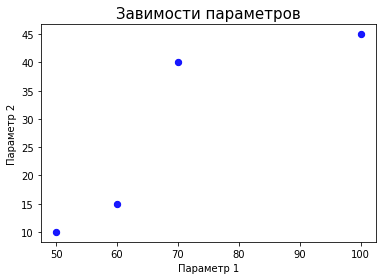

In [3]:
%matplotlib inline
plt.xlabel('Параметр 1')
plt.ylabel('Параметр 2')
plt.title('Завимости параметров', fontsize = 15)
plt.scatter(x_hw, y_hw, 40, 'b', alpha = 0.9)

In [4]:
# Выпишем матрицу Х:

X = np.array([[1, 50], [1, 60], [1, 70], [1, 100]])
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [5]:
# Выпишем вектор Y:

Y = np.array([[10], [15], [40], [45]])
Y

array([[10],
       [15],
       [40],
       [45]])

Выписываем формулу по кусочкам. Сначала перемножим матрицу *объекты-признаки* саму на себя
$$
X^T\cdot X
$$

In [6]:
X_T_X = (X.T).dot(X)

X_T_X

array([[    4,   280],
       [  280, 21000]])

Теперь найдём обратную матрицу к ней.
$$
\left(X^TX\right)^{-1}
$$

In [7]:
from numpy.linalg import inv

X_T_X_inverted = inv(X_T_X)

X_T_X_inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

Осталось дописать формулу до конца
$$
\left(X^TX\right)^{-1}X^TY
$$

In [8]:
w = X_T_X_inverted.dot(X.T).dot(Y)

print("w_1=%.5f, w_2=%.3f" % (w[0][0],w[1][0]))

w_1=-22.50000, w_2=0.714


По уроку 3.8

In [9]:
w = inv(
    (X.T).dot(X)
).dot(
    X.T
).dot(
    Y
)

w

array([[-22.5       ],
       [  0.71428571]])

Значения, рассчитанные разными способами, совпали с высокой точностью.

То есть наш набор из четырех точек хорошо описывает прямая линия с уравнением $y = -22.5 + 0.714\cdot x$. Проверим это графически.

In [10]:
X[:,1]

array([ 50,  60,  70, 100])

In [11]:
from matplotlib import pyplot as plt
import numpy as np

# задаём границы координатных осей
margin = 5
X_min = X[:,1].min()-margin
X_max = X[:,1].max()+margin

# генерируем набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0][0] + w[1][0]*X_support

In [ ]:
Y_model

array([ 8.21428571,  8.71212121,  9.20995671,  9.70779221, 10.20562771,
       10.7034632 , 11.2012987 , 11.6991342 , 12.1969697 , 12.69480519,
       13.19264069, 13.69047619, 14.18831169, 14.68614719, 15.18398268,
       15.68181818, 16.17965368, 16.67748918, 17.17532468, 17.67316017,
       18.17099567, 18.66883117, 19.16666667, 19.66450216, 20.16233766,
       20.66017316, 21.15800866, 21.65584416, 22.15367965, 22.65151515,
       23.14935065, 23.64718615, 24.14502165, 24.64285714, 25.14069264,
       25.63852814, 26.13636364, 26.63419913, 27.13203463, 27.62987013,
       28.12770563, 28.62554113, 29.12337662, 29.62121212, 30.11904762,
       30.61688312, 31.11471861, 31.61255411, 32.11038961, 32.60822511,
       33.10606061, 33.6038961 , 34.1017316 , 34.5995671 , 35.0974026 ,
       35.5952381 , 36.09307359, 36.59090909, 37.08874459, 37.58658009,
       38.08441558, 38.58225108, 39.08008658, 39.57792208, 40.07575758,
       40.57359307, 41.07142857, 41.56926407, 42.06709957, 42.56

In [12]:
X_support

array([ 45.        ,  45.60606061,  46.21212121,  46.81818182,
        47.42424242,  48.03030303,  48.63636364,  49.24242424,
        49.84848485,  50.45454545,  51.06060606,  51.66666667,
        52.27272727,  52.87878788,  53.48484848,  54.09090909,
        54.6969697 ,  55.3030303 ,  55.90909091,  56.51515152,
        57.12121212,  57.72727273,  58.33333333,  58.93939394,
        59.54545455,  60.15151515,  60.75757576,  61.36363636,
        61.96969697,  62.57575758,  63.18181818,  63.78787879,
        64.39393939,  65.        ,  65.60606061,  66.21212121,
        66.81818182,  67.42424242,  68.03030303,  68.63636364,
        69.24242424,  69.84848485,  70.45454545,  71.06060606,
        71.66666667,  72.27272727,  72.87878788,  73.48484848,
        74.09090909,  74.6969697 ,  75.3030303 ,  75.90909091,
        76.51515152,  77.12121212,  77.72727273,  78.33333333,
        78.93939394,  79.54545455,  80.15151515,  80.75757576,
        81.36363636,  81.96969697,  82.57575758,  83.18

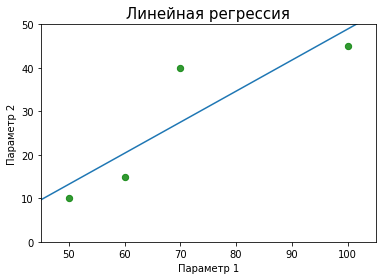

In [13]:
# настройка графика 
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.xlabel('Параметр 1')
plt.ylabel('Параметр 2')
plt.title('Линейная регрессия', fontsize = 15)
plt.plot(X_support, Y_model)

plt.show()

### Домашняя работа

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [ ]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

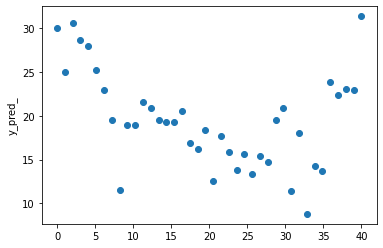

In [ ]:
x = np.linspace(0, 40, num = 40)
plt.ylabel('y_pred_')
plt.scatter(x, y_pred_)
plt.show()

In [ ]:
err = y_true_ - y_pred_
err

array([-6.  , -3.43,  4.13,  4.79,  8.26,  3.44, -0.1 ,  7.56,  4.98,
       -0.02, -4.  , -2.69,  0.79,  0.85, -1.08,  0.6 ,  2.57,  0.59,
        4.02, -0.21,  1.08,  1.93, -0.63,  0.69, -0.08,  0.51,  1.14,
        0.09, -1.15,  0.12,  1.24, -3.56,  4.39, -1.18, -0.21, -4.91,
       -2.34, -2.11,  1.78, -0.56])

In [ ]:
square_err = err * err
square_err

array([3.60000e+01, 1.17649e+01, 1.70569e+01, 2.29441e+01, 6.82276e+01,
       1.18336e+01, 1.00000e-02, 5.71536e+01, 2.48004e+01, 4.00000e-04,
       1.60000e+01, 7.23610e+00, 6.24100e-01, 7.22500e-01, 1.16640e+00,
       3.60000e-01, 6.60490e+00, 3.48100e-01, 1.61604e+01, 4.41000e-02,
       1.16640e+00, 3.72490e+00, 3.96900e-01, 4.76100e-01, 6.40000e-03,
       2.60100e-01, 1.29960e+00, 8.10000e-03, 1.32250e+00, 1.44000e-02,
       1.53760e+00, 1.26736e+01, 1.92721e+01, 1.39240e+00, 4.41000e-02,
       2.41081e+01, 5.47560e+00, 4.45210e+00, 3.16840e+00, 3.13600e-01])

In [ ]:
ids = np.argsort(square_err)
ids

array([ 9, 24, 27,  6, 29, 19, 34, 25, 39, 17, 15, 22, 23, 12, 13, 20, 14,
       26, 28, 33, 30, 38, 21, 37, 36, 16, 11,  1,  5, 31, 10, 18,  2, 32,
        3, 35,  8,  0,  7,  4], dtype=int64)

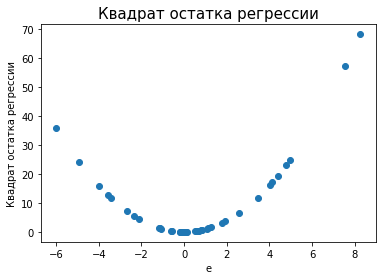

In [ ]:
plt.xlabel('e')
plt.ylabel('Квадрат остатка регрессии')
plt.title('Квадрат остатка регрессии', fontsize = 15)
plt.scatter(err[ids], square_err[ids])
plt.show()

### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

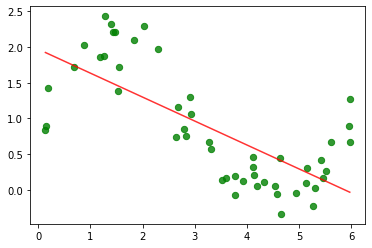

In [ ]:
data = pd.read_csv('3.10_non_linear.csv', sep=',')
margin = 0.3
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data[['x_train']], data.y_train)
y_hat = reg.predict(data[['x_train']])
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8)
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')
plt.show()

In [ ]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

degree = 5
X = generate_degrees(data['x_train'], degree)
X.shape

(50, 5)

Степень полинома 1, Ошибка 0.307
Степень полинома 2, Ошибка 0.298
Степень полинома 3, Ошибка 0.071
Степень полинома 4, Ошибка 0.067
Степень полинома 5, Ошибка 0.067
Степень полинома 6, Ошибка 0.064
Степень полинома 7, Ошибка 0.064
Степень полинома 8, Ошибка 0.058
Степень полинома 9, Ошибка 0.058
Степень полинома 10, Ошибка 0.058
Степень полинома 11, Ошибка 0.058
Степень полинома 12, Ошибка 0.057
Степень полинома 13, Ошибка 0.055
Степень полинома 14, Ошибка 0.053
Степень полинома 15, Ошибка 0.054
Степень полинома 16, Ошибка 0.056
Степень полинома 17, Ошибка 0.058
Степень полинома 18, Ошибка 0.057
Степень полинома 19, Ошибка 0.063
Степень полинома 20, Ошибка 0.066
Степень полинома 21, Ошибка 0.077
Степень полинома 22, Ошибка 0.106
Степень полинома 23, Ошибка 0.106
Степень полинома 24, Ошибка 0.106
Степень полинома 25, Ошибка 0.106
Степень полинома 26, Ошибка 0.111
Степень полинома 27, Ошибка 0.114
Степень полинома 28, Ошибка 0.119
Степень полинома 29, Ошибка 0.125
Степень полинома 30, Ош

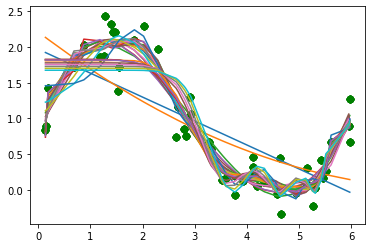

In [ ]:
from sklearn.metrics import mean_squared_error
errors = []
def train_polynomial(degree, data, errors = []):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = mean_squared_error(data['y_train'], y_pred)
    print("Степень полинома %d, Ошибка %.3f" % (degree, error))

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)
    errors.append(error)
    return(errors)
    
# Почему здеь не работает return(errors)?????????????????


    
for i in range (1, 31):
    degree = i
    train_polynomial(degree, data)

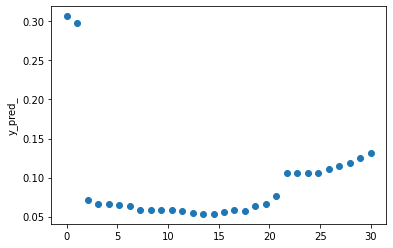

In [ ]:
errors = [0.3066963387047446, 0.29775773177727466, 0.07122538923378069, 0.06670051280821697, 0.06666033628085671, 0.06424551878175529, 0.06353029835567432, 0.05830010327903297, 0.058203411190003856, 0.058007941203798215, 0.05783082343078934, 0.05682648741223635, 0.05511008467830179, 0.05335811503231792, 0.05351942621829387, 0.056294848644304986, 0.05830868836232781, 0.05712045511502905, 0.06332849588506265, 0.06636316435705276, 0.07651578355405615, 0.10631985561471413, 0.10643742507657247, 0.10605956792147006, 0.10617660092506195, 0.11067486882233377, 0.11426562863043092, 0.1190747620027912, 0.12498983778962669, 0.13158852904830964]
x = np.linspace(0, 30, num = 30)
plt.ylabel('y_pred_')
plt.scatter(x, errors)
plt.show()

r2-score минимально при 14-ой степени полинома

Степень полинома 14, Ошибка 0.053


[0.3066963387047446,
 0.29775773177727466,
 0.07122538923378069,
 0.06670051280821697,
 0.06666033628085671,
 0.06424551878175529,
 0.06353029835567432,
 0.05830010327903297,
 0.058203411190003856,
 0.058007941203798215,
 0.05783082343078934,
 0.05682648741223635,
 0.05511008467830179,
 0.05335811503231792,
 0.05351942621829387,
 0.056294848644304986,
 0.05830868836232781,
 0.05712045511502905,
 0.06332849588506265,
 0.06636316435705276,
 0.07651578355405615,
 0.10631985561471413,
 0.10643742507657247,
 0.10605956792147006,
 0.10617660092506195,
 0.11067486882233377,
 0.11426562863043092,
 0.1190747620027912,
 0.12498983778962669,
 0.13158852904830964,
 0.05335811503231792]

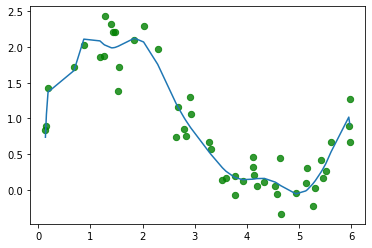

In [ ]:
degree = 14
train_polynomial(degree, data)

In [ ]:
X = data[['x_train']]
y = data['y_train']

[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания
def reg_prediction(disk):
    return a + b * disk

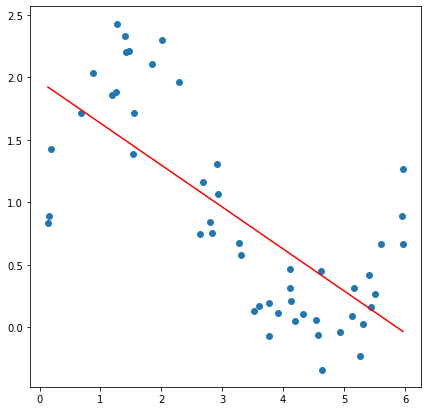

In [ ]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(data["x_train"], data["y_train"], s=35)
# помещаем предсказания
ax.plot([X.x_train.min(), X.x_train.max()], [reg_prediction(X.x_train.min()), reg_prediction(X.x_train.max())], c="red")

# отображаем картинку
plt.show()

In [ ]:
reg.predict(X[0:1])[0]

# ???????????????????????????

1.9226384286469782

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [ ]:
from sklearn.linear_model import LinearRegression

phones = pd.read_csv('1.8_phones.csv', encoding='utf-8')
phones['disk'] = phones['disk'].astype(int)
phones['price'] = phones['price'].astype(int)
phones['year'] = phones['year'].astype(int)
iOS = phones[phones['os'] == 'iOS']
X = iOS[['disk']]
y = iOS['price']

class CustomLinearReg:
    
    def __init__(self):
        pass
    
    def fit(X, y):
        LinearRegression().fit(X, y)

        
        
    def predict(X):
        
        reg = LinearRegression().fit(X, y)
        # используем встроенные методы для расчета предсказаний
        print(reg.predict(X)[0])


In [ ]:
CustomLinearReg.__init__(iOS)
CustomLinearReg.fit(X, y)
CustomLinearReg.predict(X)

11570.884615384615


**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [ ]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
#Создаем датафреймы X и y из этих данных.
data = boston["data"]
data.shape

(506, 13)

In [ ]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [ ]:
#Разбиваем эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от 
#всех данных.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Создаем модель линейной регрессии под названием reg 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
#Обучаем модель на тренировочных данных (Используем все признаки) и делаем предсказание на тестовых.
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
y_pred.shape

(102, 1)

In [ ]:
fig = plt.figure(figsize=(7, 7)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.xlabel('Память, Гб')
plt.ylabel('Цена, у.е.')
plt.title('Зависимость памяти телефона от цены', fontsize = 15)
plt.show()

In [ ]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
181,36.2,27.525252
309,20.3,23.655791
184,26.4,22.682091
401,7.2,18.078119
476,16.7,20.665970
121,20.3,22.537534
407,27.9,20.858995
9,18.9,18.543505
394,12.7,18.550278
13,20.4,19.616115


In [ ]:
#Вычислим R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.
check_test["error"] = check_test["y_pred"] - check_test["y_test"]
check_test.head()

,y_test,y_pred,error
181,36.2,27.525252,-8.674748
309,20.3,23.655791,3.355791
184,26.4,22.682091,-3.717909
401,7.2,18.078119,10.878119
476,16.7,20.665970,3.965970


In [ ]:
from sklearn.metrics import r2_score
r2_score_1=r2_score(check_test["y_pred"], check_test["y_test"])
r2_score_1

0.6770971181825802